<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Task_Lecture_11_Mohamad_Rayi_Dwi_Putra_1103213070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohamad Rayi Dwi Putra

1103213070

Task Lecture 11 CNN

Dataset :CIFAR-10

Dokumentasi propmpt chatgpt:

https://chatgpt.com/share/4ccb0dc9-64b6-467d-a791-839c02970c3c



**Mount Ke Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Mengimpor Dataset CIFAR-10**

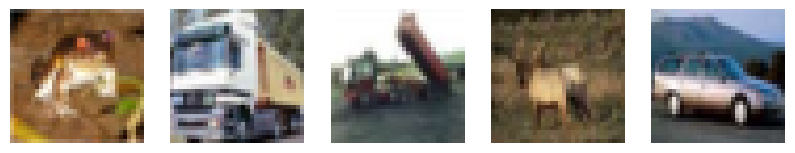

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a pixel value range of 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display some examples from the dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 10))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
plt.show()


**Membangun Arsitektur CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten the result and add dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)         

**Melatih Model**

tidak ditampilkan karena akan eror di github

In [13]:
# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/25
782/782 [==============================] - 73s 93ms/step - loss: 0.7322 - accuracy: 0.7438 - val_loss: 0.7055 - val_accuracy: 0.7561
Epoch 2/25
782/782 [==============================] - 71s 91ms/step - loss: 0.7329 - accuracy: 0.7438 - val_loss: 0.6881 - val_accuracy: 0.7698
Epoch 3/25
782/782 [==============================] - 69s 88ms/step - loss: 0.7303 - accuracy: 0.7452 - val_loss: 0.7458 - val_accuracy: 0.7458
Epoch 4/25
782/782 [==============================] - 71s 91ms/step - loss: 0.7305 - accuracy: 0.7431 - val_loss: 0.6922 - val_accuracy: 0.7621
Epoch 5/25
782/782 [==============================] - 74s 95ms/step - loss: 0.7214 - accuracy: 0.7475 - val_loss: 0.7248 - val_accuracy: 0.7557
Epoch 6/25
782/782 [==============================] - 71s 91ms/step - loss: 0.7153 - accuracy: 0.7485 - val_loss: 0.6913 - val_accuracy: 0.7648
Epoch 7/25
782/782 [==============================] - 69s 88ms/step - loss: 0.7163 - accuracy: 0.7501 - val_loss: 0.7111 - val_accuracy:

**Mengevaluasi Model**

313/313 [==============================] - 4s 13ms/step - loss: 0.7503 - accuracy: 0.7429
Test accuracy: 0.742900013923645


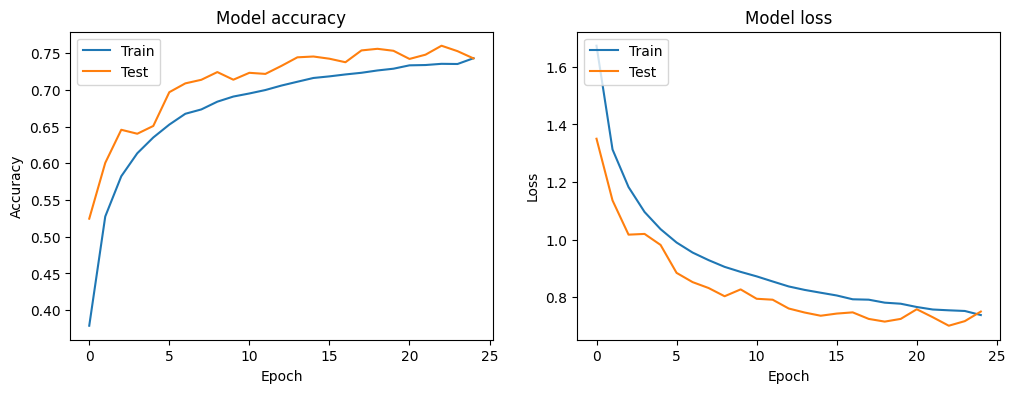

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


**Confusion Matrix**

313/313 [==============================] - 9s 29ms/step


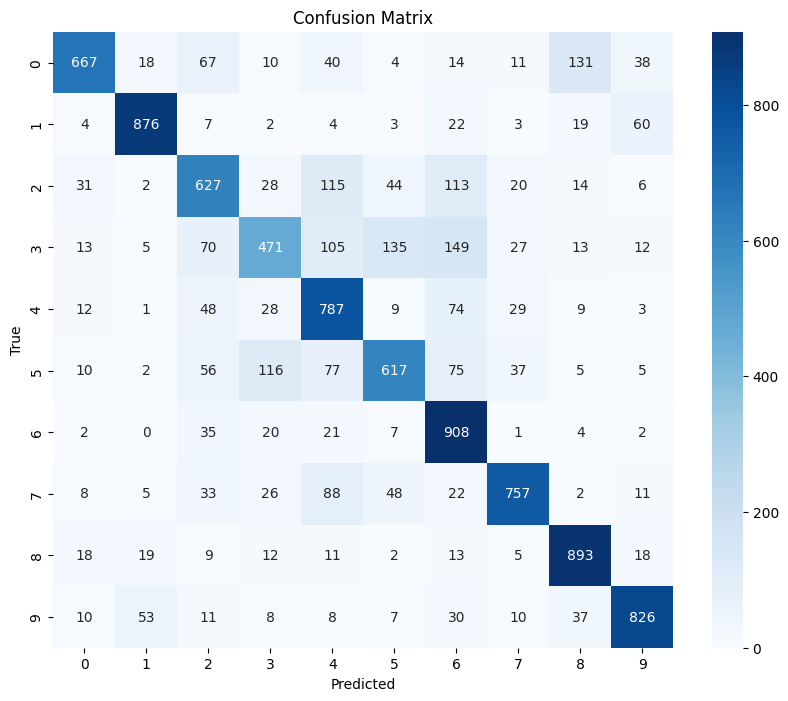

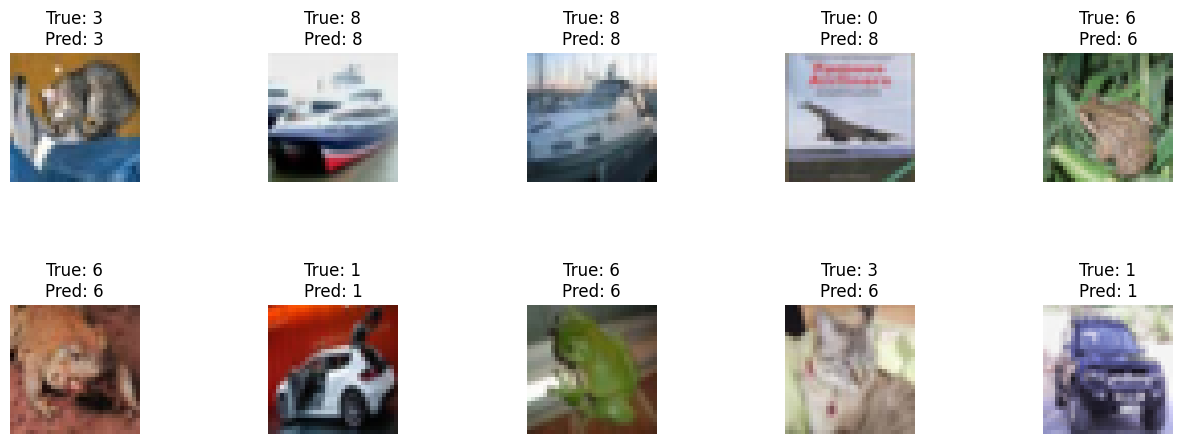

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display some predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"True: {y_true[i]}\nPred: {y_pred_classes[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)
plt.show()
